operator:xor

##### Grid before local updates #####
[1, 1, -1, 1, 1, -1, 1, 1, 1]
[-1, -1, -1, -1, -1, -1, 1, -1, -1]
[1, -1, 1, 1, 1, -1, -1, -1, 1]
[1, -1, -1, -1, 1, -1, -1, 1, -1]
[1, -1, -1, -1, -1, -1, 1, 1, 1]
[1, -1, 1, -1, 1, 1, -1, 1, -1]
[1, 1, -1, 1, -1, 1, 1, 1, -1]
[1, 1, 1, -1, 1, -1, -1, 1, 1]
[-1, 1, -1, 1, -1, 1, 1, -1, -1]

local alg count, opt count
128 , 144
142 , 144
142 , 144
142 , 144
142 , 144
142 , 144
142 , 144
142 , 144

C*/C: [0.8888888888888888, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112]

##### Grid before local updates #####
[1, -1, 1, -1, 1, -1, -1, 1, -1]
[-1, 1, -1, 1, -1, 1, 1, -1, 1]
[1, -1, 1, -1, 1, -1, 1, -1, 1]
[1, 1, -1, -1, 1, 1, -1, 1, -1]
[-1, 1, -1, 1, -1, -1, 1, -1, 1]
[1, -1, 1, -1, 1, 1, -1, 1, -1]
[-1, 1, -1, 1, -1, 1, 1, -1, 1]
[1, -1, 1, -1, 1, -1, -1, 1, -1]
[-1, 1, -1, 1, -1, 1, 1, -1, 1]


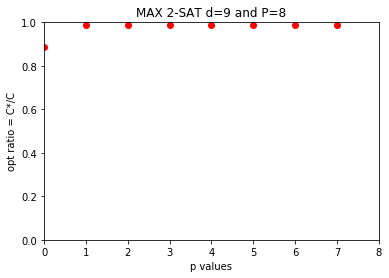

In [9]:
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

n  = 9
dim = 9
nodes = [[0 for l in range(dim)] for m in range(dim)] 
literals = {} # use key-value pair
grid = [[0 for s in range(dim)] for t in range(dim)] 
func = ["xor","xor","xor","xor","xor","xor"]
opt = 0.0
P = 8 
graphX = [0 for s in range(P)]
graphY = [0.0 for s in range(P)]
operator = func[random.randint(0,len(func)-1)]

def localUpdate2(i, j):
    threshold = 0
    if (nodes[i][j] + AND_neighbors(i,j)) < threshold:
        nodes[i][j] = 1
        #updateLiterals(i,j)

def localUpdate(i, j):
    sats = countSats()
    nodes[i][j] = nodes[i][j] * -1
    #updateLiterals(i,j)
    if(countSats() <= sats):
        nodes[i][j] = nodes[i][j] * -1
        #updateLiterals(i,j)
    #else:
        #updateLiterals(i,j)
        
def localParallelUpdate(i, j):
    localUpdate(i,j)
    if (i + 1) != dim:
        localParallelUpdate(i+1,j)
        
    if (j + 1) != dim:
        localParallelUpdate(i,j+1)
    #update grid
    
        
def localParallelUpdate1(i, j):
    localUpdate(i,j)
    if (i + 1) == dim:
        localUpdate(0,j)
    else:
        localUpdate(i+1,j)
        
    if (i - 1) == -1:
        localUpdate(dim-1,j)
    else:
        localUpdate(i-1,j)
        
    if (j + 1) == dim:
        localUpdate(i,0)
    else:
        localUpdate(i,j+1)
        
    if (j - 1) == -1:
        localUpdate(i,dim-1)
    else:
        localUpdate(i,j-1)
    
    #update only neighbors
    
def AND_neighbors(i, j):
    if (j - 1) > -1:
        if nodes[i][j-1] == -1:
            return 0
    elif (j-1) == -1:
        if nodes[i][dim-1] == -1:
            return 0
        
    if (j + 1) < dim:
        if nodes[i][j+1] == -1:
            return 0
    elif (j+1) == dim:
        if nodes[i][0] == -1:
            return 0
        
    if (i - 1) > -1:
        if nodes[i-1][j] == -1:
            return 0
    elif (i-1) == -1:
        if nodes[dim-1][j] == -1:
            return 0
        
    if (i + 1) < dim:
        if nodes[i+1][j] == -1:
            return 0
    elif (i + 1) == dim:
        if nodes[0][j] == -1:
            return 0
        
    return 1
    
def updateLiterals(i,j):
    for x in range(dim):
        for y in range(dim):
                if (abs(grid[x][y]) == abs(grid[i][j])):
                    if not ((x == i) and (y == j)):
                        nodes[x][y] = nodes[x][y] * -1

def getOPT():
    temp = 0.0
    if(operator == "or"):
        temp = 2*(dim*dim)
    elif(operator == "and"):
        temp = 2*(dim*dim)
    elif(operator == "nor"):
        temp = 2*(dim*dim)
    elif(operator == "xor"):
        if dim%2 == 0:
            temp = 2*(dim*dim)
        else:
            temp = (2*(dim*dim)) - (2*dim)
    elif(operator == "xnor"):
        temp = 2*(dim*dim)
    elif(operator == "nand"):
        temp = 2*(dim*dim)
    return temp
        
def countSats():
    count  = 0
    for i in range(dim):
        for j in range(dim):
            if(operator == "or"): #or clauses
                if (j + 1) < dim:
                    if(nodes[i][j] + nodes[i][j+1]) > 0:
                        count = count+1
                elif (j+1) == dim:
                    if(nodes[i][0] + nodes[i][j]) > 0:
                        count = count+1
                if (i + 1) < dim:
                    if(nodes[i+1][j] + nodes[i][j]) > 0:
                        count = count+1
                elif (i+1) == dim:
                    if(nodes[0][j] + nodes[i][j]) > 0:
                        count = count+1
                        
            elif(operator == "and"): #and clauses
                if (j + 1) < dim:
                    if(nodes[i][j] + nodes[i][j+1]) > 1:
                        count = count+1
                elif (j+1) == dim:
                    if(nodes[i][0] + nodes[i][j]) > 1:
                        count = count+1
                if (i + 1) < dim:
                    if(nodes[i+1][j] + nodes[i][j]) > 1:
                        count = count+1
                elif (i+1) == dim:
                    if(nodes[0][j] + nodes[i][j]) > 1:
                        count = count+1
                        
            elif(operator == "xor"): #xor clauses
                if (j + 1) < dim:
                    if(nodes[i][j] != nodes[i][j+1]):
                        count = count+1
                elif (j+1) == dim:
                    if(nodes[i][0] != nodes[i][j]):
                        count = count+1
                if (i + 1) < dim:
                    if(nodes[i+1][j] != nodes[i][j]):
                        count = count+1
                elif (i+1) == dim:
                    if(nodes[0][j] != nodes[i][j]):
                        count = count+1
                        
            elif(operator == "xnor"): #xnor clauses
                if (j + 1) < dim:
                    if(nodes[i][j] == nodes[i][j+1]):
                        count = count+1
                elif (j+1) == dim:
                    if(nodes[i][0] == nodes[i][j]):
                        count = count+1
                if (i + 1) < dim:
                    if(nodes[i+1][j] == nodes[i][j]):
                        count = count+1
                elif (i+1) == dim:
                    if(nodes[0][j] == nodes[i][j]):
                        count = count+1
                        
            elif(operator == "nor"):
                if (j + 1) < dim:
                    if(nodes[i][j+1] + nodes[i][j]) < 0:
                        count = count+1
                elif (j+1) == dim:
                    if(nodes[i][0] + nodes[i][j]) < 0:
                        count = count+1
                if (i + 1) < dim:
                    if(nodes[i+1][j] + nodes[i][j]) < 0:
                        count = count+1
                elif (i+1) == dim:
                    if(nodes[0][j] + nodes[i][j]) < 0:
                        count = count+1
                        
            elif(operator == "nand"):
                if (j + 1) < dim:
                    if(nodes[i][j] + nodes[i][j+1]) < 1:
                        count = count+1
                elif (j+1) == dim:
                    if(nodes[i][0] + nodes[i][j]) < 1:
                        count = count+1
                if (i + 1) < dim:
                    if(nodes[i+1][j] + nodes[i][j]) < 1:
                        count = count+1
                elif (i+1) == dim:
                    if(nodes[0][j] + nodes[i][j]) < 1:
                        count = count+1
    return count;

#init literals
for x in range(n):
    if random.uniform(0, 1) > 0.5:
        literals[x] = 1
    else:
        literals[x] = -1
        
#print(literals)   
    
for i in range(dim):
    for j in range(dim):
        r = random.randint(0,n-1)
        if random.uniform(0, 1) > 0.5:
            #nodes[i][j] = literals[r]
            nodes[i][j] = 1
            #grid[i][j] = (r+1)
        else:
            #nodes[i][j] = literals[r] * -1
            nodes[i][j] = -1
            #grid[i][j] = -(r+1)
               
print("operator:"+operator)
print() 
print("##### Grid before local updates #####")
for f in range(dim):
    print(nodes[f])

#for w in range(dim):
#    print(grid[w])
print() 
print("local alg count, opt count") 
for p in range(P):
    #localParallelUpdate(0,0)
    for k in range(dim):
        for q in range(dim):
            #localParallelUpdate1(k,q)
            localUpdate(k, q)

    #print("after local update rule")
    #print(nodes)
    opt = getOPT()
    print(countSats(),",",opt)  
    
    graphY[p] = countSats()/opt
    graphX[p] = p
    
print() 
print("C*/C:",graphY)    
#print("operator:"+operator)
print() 
print("##### Grid before local updates #####")
for f in range(dim):
    print(nodes[f])  
    
plt.plot(graphX,graphY, 'ro')
plt.ylabel('opt ratio = C*/C')
plt.xlabel('p values')
plt.axis([0, P, 0, 1])
plt.title('MAX 2-SAT d='+str(dim)+' and P='+str(P))
plt.show()